# 1. Explore the data
---

Let's first have a look to the datasets

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
%matplotlib inline

# import data
species = pd.read_csv('species_info.csv')
obs = pd.read_csv('observations.csv')

# have a loof at it
print(obs.info())
print('\n')
print(species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


# 2. Clean the data

---

## 2.1. Clean 'species' dataset

---

In [2]:
#have a look to the different conservation status and their distribution
print(species.conservation_status.unique())
print(species.conservation_status.value_counts(dropna=False))

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


A lot of NaN status, it would make more sense to change NaN into No Status 

In [3]:
#change NaN to 'No Status'
species.conservation_status.fillna('No Status', inplace=True)

#check
print(species.conservation_status.value_counts())

No Status             5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


Now, let's have a look to the scientific name

In [4]:
#find duplicate - suppose to have one single scientific name
print('unique species: ', species.scientific_name.nunique())
print('total # of rows:', len(species.scientific_name))

unique species:  5541
total # of rows: 5824


It appears that we have duplicates, let's find them and look their shape

In [5]:
pd.set_option('display.width', 1000)

#print all the duplicate lines - limited to first 20 otherwise otherwise to much to scroll
for name in species.scientific_name.unique()[:20]:
    if len(species[species.scientific_name == name]) > 1:
        print(species[species.scientific_name == name])
        print('\n')

print('... there is more and more, but let\'s stop here')

     category scientific_name        common_names conservation_status
4      Mammal  Cervus elaphus       Wapiti Or Elk           No Status
3017   Mammal  Cervus elaphus  Rocky Mountain Elk           No Status


     category         scientific_name                          common_names conservation_status
5      Mammal  Odocoileus virginianus                     White-Tailed Deer           No Status
3019   Mammal  Odocoileus virginianus  White-Tailed Deer, White-Tailed Deer           No Status


     category scientific_name                            common_names conservation_status
6      Mammal      Sus scrofa                     Feral Hog, Wild Pig           No Status
4447   Mammal      Sus scrofa  Pig, Pig (Feral), Wild Boar, Wild Boar           No Status


     category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery
4448   Mammal     Canis l

It is not really a problem to have different common names, we won't really use this column.
But it is a problem if there is a conflict in conservation status for the same scientific_name.

In [6]:
#print all the duplicate lines where we have conflict in conservation status
for name in species.scientific_name.unique():
    if (len(species[species.scientific_name == name]) > 1) and (species[species.scientific_name == name].conservation_status.nunique() > 1):
        print(species[species.scientific_name == name])
        print('\n')

     category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery
4448   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered


     category      scientific_name   common_names conservation_status
560      Fish  Oncorhynchus mykiss  Rainbow Trout           No Status
3283     Fish  Oncorhynchus mykiss  Rainbow Trout          Threatened




There are 2 scientific_name with problem.
Let's consider the worst conversation status. 'Endangered' for Canis Lupus and Threatened for 'Oncorhynchus mykiss'.

In [7]:
# modify conservation_status for homogeneous one
species.at[3020, 'conservation_status'] = 'Endangered'
species.at[560, 'conservation_status'] = 'Threatened'

#check 
print(species[species.scientific_name == ('Canis lupus')])
print('\n')
print(species[species.scientific_name == ('Oncorhynchus mykiss')])

     category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered
4448   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered


     category      scientific_name   common_names conservation_status
560      Fish  Oncorhynchus mykiss  Rainbow Trout          Threatened
3283     Fish  Oncorhynchus mykiss  Rainbow Trout          Threatened


Now, we are ready to get rid of duplicates

In [8]:
#drop duplicate scientific_name, we should obtain 5541 rows
species.drop_duplicates(subset='scientific_name', inplace=True)
print(species)

            category                scientific_name                                       common_names conservation_status
0             Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole           No Status
1             Mammal                      Bos bison                              American Bison, Bison           No Status
2             Mammal                     Bos taurus  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...           No Status
3             Mammal                     Ovis aries  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)           No Status
4             Mammal                 Cervus elaphus                                      Wapiti Or Elk           No Status
...              ...                            ...                                                ...                 ...
5819  Vascular Plant               Solanum parishii                                Parish's Nightshade           No Status
5820  Vascular P

Now, dataset is ready to be analyzed.

## 2.1. Clean 'obs' dataset

---

In [9]:
# have a look to unique park_name
print(obs.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


There are observations in 4 parks.

So we should have for each species 1 row per park maximum (4 rows at maximum)

In [10]:
# look if duplicates
print(obs[obs.scientific_name == 'Canis lupus'])

      scientific_name                            park_name  observations
1294      Canis lupus               Yosemite National Park            35
1766      Canis lupus                  Bryce National Park            27
7346      Canis lupus                  Bryce National Park            29
9884      Canis lupus                  Bryce National Park            74
10190     Canis lupus  Great Smoky Mountains National Park            15
10268     Canis lupus            Yellowstone National Park            60
10907     Canis lupus            Yellowstone National Park            67
13427     Canis lupus            Yellowstone National Park           203
17756     Canis lupus  Great Smoky Mountains National Park            14
19330     Canis lupus               Yosemite National Park           117
19987     Canis lupus               Yosemite National Park            44
20353     Canis lupus  Great Smoky Mountains National Park            30


Apparenty, we also have duplicates in this dataset with conflict in number of observations.

We will take the hypothesis that these observations should be sum up.

In [11]:
# sum duplicates
obs = obs.groupby(['scientific_name', 'park_name']).agg('sum').reset_index()

# check
print(obs[obs.scientific_name == 'Canis lupus'])

     scientific_name                            park_name  observations
3216     Canis lupus                  Bryce National Park           130
3217     Canis lupus  Great Smoky Mountains National Park            59
3218     Canis lupus            Yellowstone National Park           330
3219     Canis lupus               Yosemite National Park           196


Cleaning is done, dataset are ready to be analyszed

## 3. Analysis

---


### 3.1 distribution of conservation_status

---

species with a conservation status: 179.


             category conservation_status  scientific_name
0           Amphibian          Endangered                1
1           Amphibian  Species of Concern                4
2           Amphibian          Threatened                2
3                Bird          Endangered                4
4                Bird         In Recovery                3
5                Bird  Species of Concern               68
6                Fish          Endangered                3
7                Fish  Species of Concern                4
8                Fish          Threatened                4
9              Mammal          Endangered                6
10             Mammal  Species of Concern               22
11             Mammal          Threatened                2
12  Nonvascular Plant  Species of Concern                5
13            Reptile  Species of Concern                5
14     Vascular Plant          Endangered                1
15     Vascul

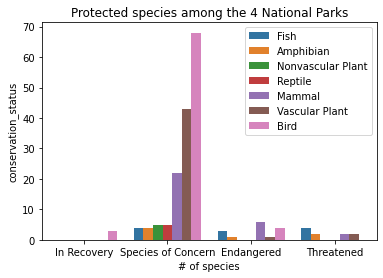

In [12]:
# import needed libraries
from matplotlib import pyplot as plt
import seaborn as sns

# remove the species without status to avoid pollution
conservation_dist = species[species.conservation_status != 'No Status']
# how many does it represents
print('species with a conservation status: {}.'.format(len(conservation_dist)))
print('\n')

# make a dataframe with counts on scientific_name
conservation_dist = conservation_dist.groupby(['category', 'conservation_status']).scientific_name.count().reset_index()
print(conservation_dist)
print('\n')

# plot the bar chart
sns.barplot(data=conservation_dist, x='conservation_status', y='scientific_name', order=['In Recovery', 'Species of Concern', 'Endangered', 'Threatened'], hue='category', hue_order=['Fish', 'Amphibian', 'Nonvascular Plant', 'Reptile', 'Mammal', 'Vascular Plant', 'Bird'])
plt.legend(loc=1)
plt.xlabel('# of species')
plt.ylabel('conservation_status')
plt.title('Protected species among the 4 National Parks')
plt.show()



Most of 179 species with status are 'species of concern'. 
The first three categories of species of concern are Birds, Vascular Plant and Mammal.

### 3.2. likeliness of certain types of species to be under protection status

---

In [13]:
# compare species with a proctection status and the ones without
# change all status to a single one called 'Status'
species_status = species.replace(['Endangered', 'Species of Concern', 'In Recovery', 'Threatened'], 'Status')
print(species_status)

# pivot to see the distribution among categories
species_status_pivot = pd.pivot_table(species_status, index='category', columns='conservation_status', values='scientific_name', aggfunc='count', margins=True)
species_status_pivot.sort_values(by='Status', ascending=False, inplace=True)
print(species_status_pivot)



            category                scientific_name                                       common_names conservation_status
0             Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole           No Status
1             Mammal                      Bos bison                              American Bison, Bison           No Status
2             Mammal                     Bos taurus  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...           No Status
3             Mammal                     Ovis aries  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)           No Status
4             Mammal                 Cervus elaphus                                      Wapiti Or Elk           No Status
...              ...                            ...                                                ...                 ...
5819  Vascular Plant               Solanum parishii                                Parish's Nightshade           No Status
5820  Vascular P

We will now run a hypothesis test to compare each category to the ALL and see if a species is more likely to be endangered.

* hyp null: category X has same chances to be under status compared to ALL species
* hyp alt: category X is not associated with ALL species

In [14]:
# import needed library to do hypothesis test
from scipy.stats import chi2_contingency

# drop the column All
species_status_pivot2 = species_status_pivot.drop('All', axis=1)
print(species_status_pivot2)
print('\n')

conservation_status  No Status  Status
category                              
All                       5362     179
Bird                       413      75
Vascular Plant            4216      46
Mammal                     146      30
Fish                       114      11
Amphibian                   72       7
Nonvascular Plant          328       5
Reptile                     73       5




In [15]:
# loop to display contingency table for all categories compared to All and run a hypothesis test
significant_threshold = 0.05

for category in species_status_pivot2.index[1:]:
    print(species_status_pivot2.loc[['All', category]])
    chi2, pval, dof, exp = chi2_contingency(species_status_pivot2.loc[['All', category]])
    print(pval)
    print(exp)
    if pval <= significant_threshold:
        print('Categories are independants')
        if species_status_pivot2.loc[category].Status >= exp[1][1]:
            print(category, 'category is more likely to be endangered than total of species observed.')
        else:
            print(category, 'category is less likely to be endangered than total of species observed.')
    else:
        print('Categories are associated.')
        print('There is an equal likelihood to be endangered than total of species observed.')
    print('\n')
    




conservation_status  No Status  Status
category                              
All                       5362     179
Bird                       413      75
7.723449629751259e-37
[[5307.55929673  233.44070327]
 [ 467.44070327   20.55929673]]
Categories are independants
Bird category is more likely to be endangered than total of species observed.


conservation_status  No Status  Status
category                              
All                       5362     179
Vascular Plant            4216      46
2.8989115202016285e-12
[[5413.82209528  127.17790472]
 [4164.17790472   97.82209528]]
Categories are independants
Vascular Plant category is less likely to be endangered than total of species observed.


conservation_status  No Status  Status
category                              
All                       5362     179
Mammal                     146      30
4.9493889009621755e-21
[[5338.43414378  202.56585622]
 [ 169.56585622    6.43414378]]
Categories are independants
Mammal category is mo

In [16]:
#fonction to run hypothesis test between 2 differents species
def conv_status_diff(category1, category2):
    print(species_status_pivot2.loc[[category1, category2]])
    chi2, pval, dof, exp = chi2_contingency(species_status_pivot2.loc[[category1, category2]])
    print('pval = ', pval)
    print('\n')

conv_status_diff('Reptile', 'Mammal')
conv_status_diff('Mammal', 'Bird')

conservation_status  No Status  Status
category                              
Reptile                     73       5
Mammal                     146      30
pval =  0.03835559022969898


conservation_status  No Status  Status
category                              
Mammal                     146      30
Bird                       413      75
pval =  0.6875948096661336




### 3.3. What are the most observed species in each park

---

In [17]:
# group by

# merge the two datasets on scientific_names to have the categories
joined_datasets = pd.merge(obs, species[['scientific_name','category']], on='scientific_name')

# groupby park_name and category and sort all the values to have a proper results at the end
joined_datasets2 = joined_datasets.groupby(['park_name', 'category'])['observations'].sum().reset_index().sort_values(['park_name', 'observations'], ascending=False)


# groupby once more for a clean result
joined_datasets3 = joined_datasets2.groupby(['park_name', 'category'], sort=False)['observations'].sum()


print(joined_datasets2)
print('\n')
print(joined_datasets3)

                              park_name           category  observations
27               Yosemite National Park     Vascular Plant        665461
22               Yosemite National Park               Bird         76207
25               Yosemite National Park  Nonvascular Plant         49783
24               Yosemite National Park             Mammal         30339
23               Yosemite National Park               Fish         18615
26               Yosemite National Park            Reptile         11483
21               Yosemite National Park          Amphibian         11444
20            Yellowstone National Park     Vascular Plant       1112927
15            Yellowstone National Park               Bird        127251
18            Yellowstone National Park  Nonvascular Plant         83021
17            Yellowstone National Park             Mammal         50795
16            Yellowstone National Park               Fish         30574
19            Yellowstone National Park            